In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel("Dhaka Rent.xlsx")  
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [80]:
df.shape

(60, 2)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [82]:
df.isnull().sum()

area    0
rent    0
dtype: int64

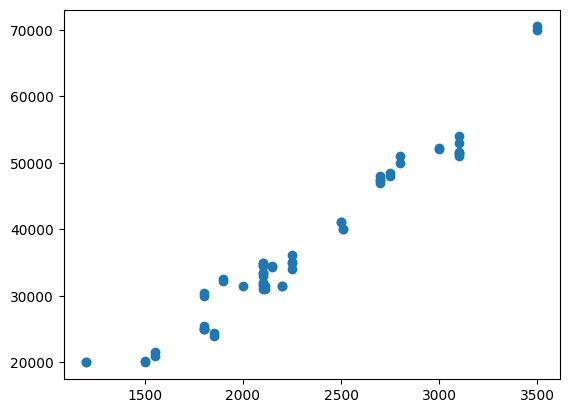

In [83]:
plt.scatter(df['area'],df['rent'])

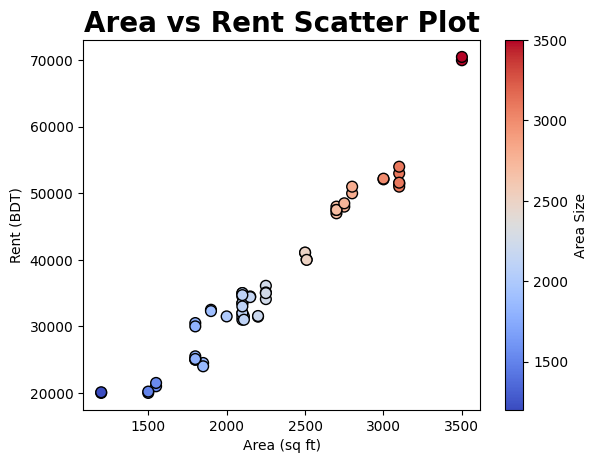

In [84]:
plt.scatter(df['area'], df['rent'], c=df['area'], cmap='coolwarm', s=60, alpha=1, edgecolors='k')
plt.title('Area vs Rent Scatter Plot', fontsize=20, weight='bold')
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent (BDT)')
plt.colorbar(label='Area Size')
plt.show()

In [85]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


LR with HardCoded Formula

In [86]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [87]:
x= df['area']
y= df['rent']
def_x= x-np.mean(x)
def_y= y-np.mean(y)



In [88]:
m= np.sum(def_x*def_y)/ np.sum(def_x**2)

In [89]:
m

np.float64(21.292661473611954)

In [90]:
x

0     2000
1     2100
2     2500
3     2250
4     3000
5     1900
6     1500
7     1850
8     2700
9     2100
10    2150
11    2100
12    2100
13    2510
14    2250
15    3100
16    1800
17    1550
18    1800
19    2700
20    2110
21    2100
22    3500
23    1200
24    2800
25    3100
26    2750
27    1800
28    2200
29    3100
30    2100
31    2100
32    2500
33    2250
34    3000
35    1900
36    1500
37    1850
38    2700
39    2100
40    2150
41    2100
42    2100
43    2510
44    2250
45    3100
46    1800
47    1550
48    1800
49    2700
50    2110
51    2100
52    3500
53    1200
54    2800
55    3100
56    2750
57    1800
58    2200
59    3100
Name: area, dtype: int64

In [91]:
y

0     31500
1     35000
2     41050
3     36100
4     52100
5     32500
6     20000
7     24500
8     48000
9     31000
10    34500
11    32000
12    34500
13    40050
14    34100
15    51500
16    30500
17    21000
18    25000
19    47000
20    31500
21    33500
22    70000
23    20000
24    50000
25    53000
26    48000
27    25000
28    31460
29    51400
30    33500
31    35010
32    41100
33    35100
34    52200
35    32300
36    20200
37    24000
38    47500
39    31500
40    34400
41    32020
42    34700
43    40000
44    35000
45    51000
46    30000
47    21500
48    25500
49    47500
50    31000
51    33000
52    70500
53    20100
54    51000
55    54000
56    48500
57    25100
58    31560
59    51600
Name: rent, dtype: int64

In [92]:
c= np.mean(y) - (m*np.mean(x))

In [93]:
c


np.float64(-11469.7354464311)

In [94]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [95]:
y=m*2000+c

In [96]:
y

np.float64(31115.58750079281)

Linear Regression using SKLEARN

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
reg= LinearRegression()

In [99]:
reg.fit(df[['area']], df['rent'])

LinearRegression()

In [100]:
reg.coef_

array([21.29266147])

In [101]:
reg.intercept_

np.float64(-11469.735446431114)

In [102]:
reg.predict([[2000]])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31115.58750079])

In [103]:
reg.predict(df[['area']])

array([31115.58750079, 33244.85364815, 41761.9182376 , 36438.7528692 ,
       52408.2489744 , 28986.32135343, 20469.25676399, 27921.68827975,
       46020.45053232, 33244.85364815, 34309.48672183, 33244.85364815,
       33244.85364815, 41974.84485233, 36438.7528692 , 54537.51512177,
       26857.05520607, 21533.88983767, 26857.05520607, 46020.45053232,
       33457.78026289, 33244.85364815, 63054.57971121, 14081.4583219 ,
       48149.71667968, 54537.51512177, 47085.083606  , 26857.05520607,
       35374.11979552, 54537.51512177, 33244.85364815, 33244.85364815,
       41761.9182376 , 36438.7528692 , 52408.2489744 , 28986.32135343,
       20469.25676399, 27921.68827975, 46020.45053232, 33244.85364815,
       34309.48672183, 33244.85364815, 33244.85364815, 41974.84485233,
       36438.7528692 , 54537.51512177, 26857.05520607, 21533.88983767,
       26857.05520607, 46020.45053232, 33457.78026289, 33244.85364815,
       63054.57971121, 14081.4583219 , 48149.71667968, 54537.51512177,
      

In [104]:
df2=df.copy()
df2['predicted']= reg.predict(df[['area']])

In [105]:
df2.head()

,area,rent,predicted
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [106]:
reg.score(df[['area']], df['rent'])

0.950249380357677

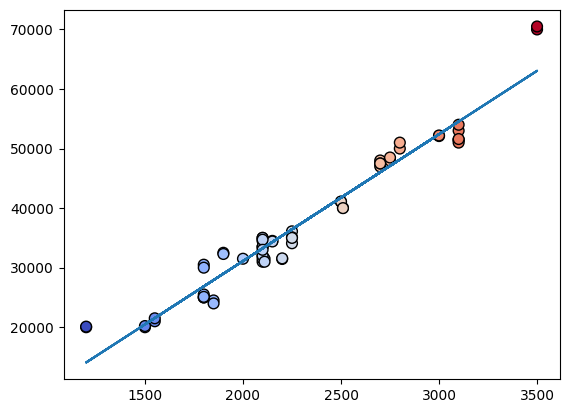

In [109]:
plt.plot(df[['area']], reg.predict(df[['area']]))
plt.scatter(df['area'],
             df['rent'], 
             c=df['area'],
               cmap='coolwarm', 
               s=60, alpha=1, 
               edgecolors='k')

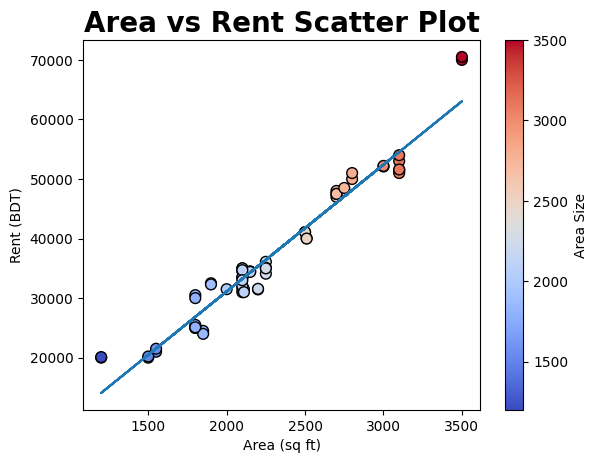

In [ ]:
plt.plot(df[['area']], reg.predict(df[['area']]))
plt.Figure(figsize=(10,7))
plt.scatter(df['area'],
             df['rent'], 
             c=df['area'],
               cmap='coolwarm', 
               s=60, alpha=1, 
               edgecolors='k')
plt.title('Area vs Rent Scatter Plot', fontsize=20, weight='bold')
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent (BDT)')
plt.colorbar(label='Area Size')
plt.show()

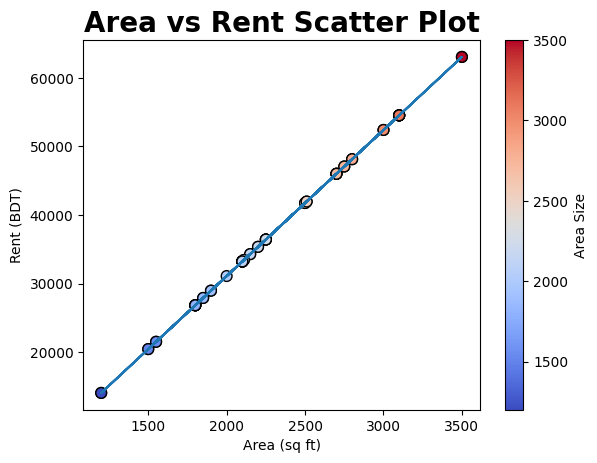

In [111]:
plt.plot(df[['area']], reg.predict(df[['area']]))
plt.Figure(figsize=(10,7))
plt.scatter(df['area'],
             reg.predict(df[['area']]), 
             c=df['area'],
               cmap='coolwarm', 
               s=60, alpha=1, 
               edgecolors='k')
plt.title('Area vs Rent Scatter Plot', fontsize=20, weight='bold')
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent (BDT)')
plt.colorbar(label='Area Size')
plt.show()

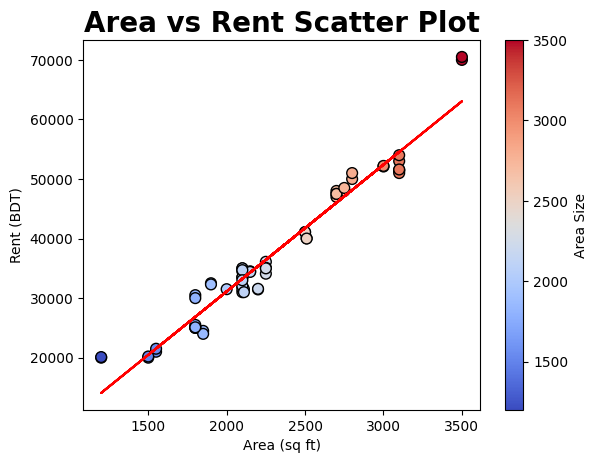

In [113]:
plt.plot(df[['area']], reg.predict(df[['area']]),color='red')
plt.Figure(figsize=(10,7))
plt.scatter(df['area'],
             df['rent'], 
             c=df['area'],
               cmap='coolwarm', 
               s=60, alpha=1, 
               edgecolors='k')
plt.title('Area vs Rent Scatter Plot', fontsize=20, weight='bold')
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent (BDT)')
plt.colorbar(label='Area Size')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16556\1939570535.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  equ= f'y={float(m):.2f}x + {float(c):.2f}'


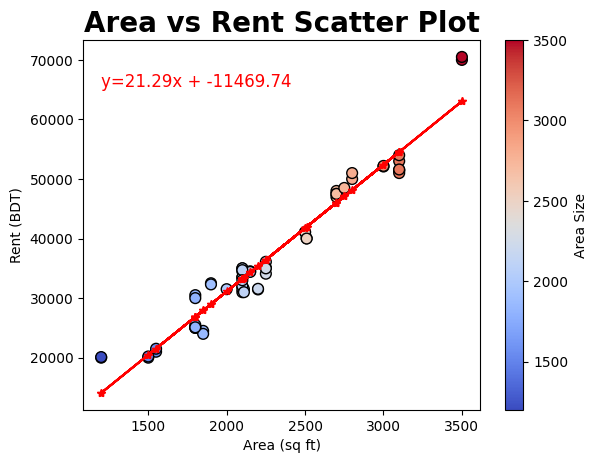

In [ ]:
plt.plot(df[['area']], reg.predict(df[['area']]),color='red', marker='*')
plt.Figure(figsize=(10,7))
m= reg.coef_
c= reg.intercept_
equ= f'y={float(m):.2f}x + {float(c):.2f}'
plt.text(min(df['area']), max(df['rent'])-5000, equ, color='red', fontsize=12)
plt.scatter(df['area'],
             df['rent'], 
             c=df['area'],
               cmap='coolwarm', 
               s=60, alpha=1, 
               edgecolors='k')
plt.title('Area vs Rent Scatter Plot', fontsize=20, weight='bold')
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent (BDT)')
plt.colorbar(label='Area Size')
plt.show()

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_squared_error(df2[['rent']], df2['predicted'])

6778077.204095561

In [126]:
mean_absolute_error(df2[['rent']], df2['predicted'])

2009.8695093576282